In [1]:
import pandas as pd
import numpy as np
import copy, math
import csv
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder


In [2]:
X_train_df = pd.read_csv("X_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_train_df = pd.read_csv("y_train.csv")
y_test_df = pd.read_csv("y_test.csv")
print(f"X_train_df shape: {X_train_df.shape} \nX_test_df shape: {X_test_df.shape} \ny_train_df shape: {y_train_df.shape} \ny_test_df shape: {y_test_df.shape} \n ")


X_train_df shape: (19, 12) 
X_test_df shape: (19, 12) 
y_train_df shape: (19, 1) 
y_test_df shape: (19, 1) 
 


In [3]:
X = pd.concat([X_train_df, X_test_df], axis=0).reset_index(drop=True)
y = pd.concat([y_train_df, y_test_df], axis=0).reset_index(drop=True)
print(f"X: {X.shape} \ny shape: {y.shape}")

X: (38, 12) 
y shape: (38, 1)


In [4]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417,136,360,1,Urban
5,LP001854,Male,Yes,3+,Graduate,No,5250,0,94,360,1,Urban
6,LP002505,Male,Yes,0,Graduate,No,4333,2451,110,360,1,Urban
7,LP002862,Male,Yes,2,Not Graduate,No,6125,1625,187,480,1,Semiurban
8,LP001630,Male,No,0,Not Graduate,No,2333,1451,102,480,0,Urban
9,LP001964,Male,Yes,0,Not Graduate,No,1800,2934,93,360,0,Urban


In [5]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,4937.868421,1547.394737,145.842105,342.631579,0.842105
std,3185.266047,1491.303267,72.838409,75.002134,0.369537
min,1800.000000,0.000000,50.000000,180.000000,0.000000
25%,2911.500000,0.000000,110.250000,360.000000,1.000000
50%,3823.000000,1646.000000,127.500000,360.000000,1.000000
75%,5948.000000,2910.500000,167.250000,360.000000,1.000000
max,15000.000000,4266.000000,436.000000,480.000000,1.000000


In [6]:
X.duplicated().sum()

0

In [7]:
X.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        1
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Feature engineering

In [8]:
# # # Feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# ## chi2: Chi-squared stats of non-negative features for classification tasks.
# fit = test.fit(X, y)
# fit.scores_

In [9]:
# Encoding The Loan_ID
for i in range(len(X)):
    X.loc[i, 'Loan_ID'] = i
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,Male,No,0,Graduate,No,4950,0,125,360,1,Urban
1,1,Male,Yes,1,Graduate,No,2882,1843,123,480,1,Semiurban
2,2,Male,Yes,0,Graduate,No,3000,3416,56,180,1,Semiurban
3,3,Male,Yes,2,Graduate,No,9703,0,112,360,1,Urban
4,4,Male,Yes,0,Graduate,No,2333,2417,136,360,1,Urban


In [10]:
#Encoding Dependents
for i in range(len(X)):
    if X.loc[i, 'Dependents'] == "3+": X.loc[i, 'Dependents'] = "3"

In [11]:
# ordinal features
X['Property_Area'] = X['Property_Area'].astype(str)
Property_Area_encoder = OrdinalEncoder(categories=[['Rural', 'Semiurban', 'Urban']])
X['Property_Area'] = Property_Area_encoder.fit_transform(X[['Property_Area']])
X['Property_Area'].head()

0    2.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Property_Area, dtype: float64

In [12]:
# nominal features
label_encoder = LabelEncoder()

X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Married'] = label_encoder.fit_transform(X['Married'])
X['Education'] = label_encoder.fit_transform(X['Education'])
X['Self_Employed'] = label_encoder.fit_transform(X['Self_Employed'])
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,4950,0,125,360,1,2.0
1,1,1,1,1,0,0,2882,1843,123,480,1,1.0
2,2,1,1,0,0,0,3000,3416,56,180,1,1.0
3,3,1,1,2,0,0,9703,0,112,360,1,2.0
4,4,1,1,0,0,0,2333,2417,136,360,1,2.0
5,5,1,1,3,0,0,5250,0,94,360,1,2.0
6,6,1,1,0,0,0,4333,2451,110,360,1,2.0
7,7,1,1,2,1,0,6125,1625,187,480,1,1.0
8,8,1,0,0,1,0,2333,1451,102,480,0,2.0
9,9,1,1,0,1,0,1800,2934,93,360,0,2.0


In [13]:
# onehot = OneHotEncoder(dtype=int, sparse_output=False)  # use sparse_output=False to avoid FutureWarning

# # Perform OneHotEncoding
# nominals = pd.DataFrame(
#     onehot.fit_transform(X[['Gender', 'Married', 'Education', 'Self_Employed']]).toarray(),
#     columns=['Female', 'Male', 'Married_No', 'Married_Yes', 'Graduate', 'Not_Graduate', 'Self_Employed_No', 'Self_Employed_Yes']
# )

# # Display the encoded dataframe
# nominals


In [14]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,4950,0,125,360,1,2.0
1,1,1,1,1,0,0,2882,1843,123,480,1,1.0
2,2,1,1,0,0,0,3000,3416,56,180,1,1.0
3,3,1,1,2,0,0,9703,0,112,360,1,2.0
4,4,1,1,0,0,0,2333,2417,136,360,1,2.0
5,5,1,1,3,0,0,5250,0,94,360,1,2.0
6,6,1,1,0,0,0,4333,2451,110,360,1,2.0
7,7,1,1,2,1,0,6125,1625,187,480,1,1.0
8,8,1,0,0,1,0,2333,1451,102,480,0,2.0
9,9,1,1,0,1,0,1800,2934,93,360,0,2.0


In [15]:
# # Feature selection
# test = SelectKBest(score_func=chi2, k=6)
# fit = test.fit(X, y)
# fit.scores_

In [16]:
# new_Features = fit.transform(X)
# new_Features

In [17]:
# # New DF
# mask = test.get_support()
# selected_columns = X.columns[mask]
# X = pd.DataFrame(new_Features, columns=selected_columns)
# X

In [18]:
# Encoding labels
y['Target'] = y['Target'].astype(str)
Labels_encoder = OrdinalEncoder(categories=[['N', 'Y']])
y['Target'] = Labels_encoder.fit_transform(y[['Target']])
y.head()

,Target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Logistic Regression (Hard coded)

In [19]:
def zscore_normalize_features(X):
    # Select only numeric columns
    numeric_X = X.select_dtypes(include=[np.number])
    mu = np.mean(numeric_X, axis=0)
    sigma = np.std(numeric_X, axis=0)
    X_norm = (numeric_X - mu) / sigma
    return X_norm, mu, sigma


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        f_wb_i = np.clip(f_wb_i, 1e-10, 1-1e-10)  # Prevents log(0)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    return cost / m

In [22]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n,)
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i 
    dj_dw/=m
    dj_db/=m
    
    return dj_db, dj_dw

In [23]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
        
        if i<100000:
            J_history.append( compute_cost(X, y, w, b) )
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [24]:
# X_norm, _, _ = zscore_normalize_features(X)
# w_tmp = np.zeros(X_norm.shape[1])
# b_tmp = 0.
# alpha = 0.1
# iters = 10000

# w_final, b_final, J_hist = gradient_descent(X_norm, y, w_tmp, b_tmp, alpha, iters)
# print(f"Final parameters: w: {w_final}, b: {b_final} ")

# Logistic Regression (Scikit-learn)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,4950,0,125,360,1,2.0
1,1,1,1,1,0,0,2882,1843,123,480,1,1.0
2,2,1,1,0,0,0,3000,3416,56,180,1,1.0
3,3,1,1,2,0,0,9703,0,112,360,1,2.0
4,4,1,1,0,0,0,2333,2417,136,360,1,2.0
5,5,1,1,3,0,0,5250,0,94,360,1,2.0
6,6,1,1,0,0,0,4333,2451,110,360,1,2.0
7,7,1,1,2,1,0,6125,1625,187,480,1,1.0
8,8,1,0,0,1,0,2333,1451,102,480,0,2.0
9,9,1,1,0,1,0,1800,2934,93,360,0,2.0


In [27]:
y

,Target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
y = y.values.ravel()

In [44]:
lr_model = LogisticRegression(solver='sag', max_iter=10000)
lr_model.fit(X, y)

LogisticRegression(max_iter=10000, solver='sag')

In [45]:
accuracy = lr_model.score(X_test1, y_test1)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

Model accuracy on test set: 62.50%


In [46]:
print(lr_model.score(X, y))

0.7368421052631579


# Using PCA

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

C:\Users\Mouheb\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


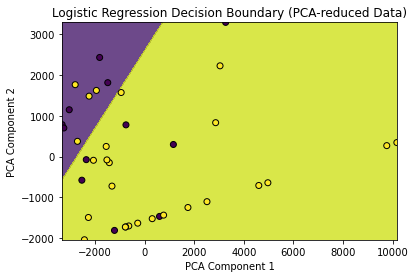

In [48]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.8),  # Increased step size
                     np.arange(y_min, y_max, 0.8))

# Predict for each point in the grid
Z = lr_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Create plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Logistic Regression Decision Boundary (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()